<font size ="8"> <div align="center">**Creating a Product Recommendation System for Amazon**</div></font>
<font size ="5"> <div align="center">By **Jon Nyner Gavan**</div></font>


--------------------
# **Context of the Project (Amazon Product)**
--------------------

<p align = "justify">
Today, information is growing exponentially with volume, velocity and variety throughout the globe. This has lead to information overload, and too many choices for the consumer of any business. It represents a real dilemma for these consumers and they often turn to denial. Recommender Systems are one of the best tools that help recommending products to consumers while they are browsing online. Providing personalized recommendations which is most relevant for the user is what's most likely to keep them engaged and help business.

<p align = "justify">
E-commerce websites like Amazon, Walmart, Target and Etsy use different recommendation models to provide personalized suggestions to different users. These companies spend millions of dollars to come up with algorithmic techniques that can provide personalized recommendations to their users.

<p align = "justify">
Amazon, for example, is well-known for its accurate selection of recommendations in its online site. Amazon's recommendation system is capable of intelligently analyzing and predicting customers' shopping preferences in order to offer them a list of recommended products. Amazon's recommendation algorithm is therefore a key element in using AI to improve the personalization of its website. For example, one of the baseline recommendation models that Amazon uses is item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

-----------------------------
## **Dataset Description:**
-----------------------------

The Amazon dataset contains the following attributes:

- **userId:** Every user identified with a unique id
- **productId:** Every product identified with a unique id
- **Rating:** The rating of the corresponding product by the corresponding user
- **timestamp:** Time of the rating. We **will not use this column** to solve the current problem

----------------
## **Objectives of the Study**
----------------
<p align = "justify">
You are a Data Science Manager at Amazon, and have been given the task of building a recommendation system to recommend products to customers based on their previous ratings for other products. You have a collection of labeled data of Amazon reviews of products. The goal is to extract meaningful insights from the data and build a recommendation system that helps in recommending products to online consumers.



**Note:** The code has some user defined functions that will be usefull while making recommendations and measure model performance, you can use these functions or can create your own functions.

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use **Google Colab** for this project.

Let's start by mounting the Google drive on Colab.

### **Importing the necessary libraries and overview of the dataset**

**Importing the necessary libraries**

In [ ]:
# installing the surprise library
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3156223 sha256=6ef67066996cc3dbd1be86a639a58b73e83a3ea097be1af077843975d47cd818
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metric for model evaluation
from sklearn.metrics import mean_squared_error

**Loading the Data and Making logical assumptions**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
path = '/content/drive/MyDrive/Classroom/Data Science/MIT Summer School/7 Recommendation Systems/3 Assessment Project/Dataset - Ratings Electronics.csv'

df = pd.read_csv(path, header = None)                                           # There are no headers in the data file
df.columns = ['user_id', 'prod_id', 'rating', 'timestamp']                      # Adding column names
df = df.drop('timestamp', axis = 1)                                             # Dropping timestamp
df_copy = df.copy(deep = True)

In [ ]:
# Checking the first 5 rows of the data
df_copy.head()

,user_id,prod_id,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [ ]:
# Checking hte shape of the data
df_copy.shape

(7824482, 3)

* **As this dataset is very large and has 7,824,482 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few products and also some products are rated by very few users. Hence, we can reduce the dataset by considering certain logical assumptions.**

* Here, we will be taking users who have given at least 50 ratings, and the products that have at least 5 ratings, as when we shop online we prefer to have some number of ratings of a product.

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of ratings
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [ ]:
# We want our users to have at least 50 ratings to be considered
RATINGS_CUTOFF = 50

remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the products
prods = df.prod_id

# Create a dictionary from products to their number of ratings
ratings_count = dict()
for prod in prods:
    # If we already have the product, just add 1 to its rating count
    if prod in ratings_count:
        ratings_count[prod] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[prod] = 1

In [ ]:
# We want our item to have at least 5 ratings to be considered
RATINGS_CUTOFF = 5

remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df_final = df.loc[~ df.prod_id.isin(remove_users)]

In [ ]:
# Print a few rows of the imported dataset
df_final.head()

,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0


## **Exploratory Data Analysis**

**Shape of the data**

In [ ]:
# Check the number of rows and columns and provide observations
rows, columns = df_final.shape
print("No of rows: ", rows)
print("No of columns: ", columns)

No of rows:  65290
No of columns:  3


* **From the results above it can be seen that there are 65290 rows (datapoints) with 3 columns each. This number of rows is considerably less than the original number of 7,824,482 due to the logical assumptions we have made**

**Data types**

In [ ]:
# Check Data types and provide observations
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65290 entries, 1310 to 7824427
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  65290 non-null  object 
 1   prod_id  65290 non-null  object 
 2   rating   65290 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


* **From here it can be seen that all columns contain the same number of data points 65290. Both user and Product IDs are of object data type and only the rating column is full of integers**

**Checking for missing values**

In [ ]:
# Check for missing values present
df_final.isnull().sum()

user_id    0
prod_id    0
rating     0
dtype: int64

**From the results above, there are no missing values present in the final dataset**

**Summary Statistics**

In [ ]:
# Summary statistics of 'rating' variable
df_final['rating'].describe()

count    65290.000000
mean         4.294808
std          0.988915
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [ ]:
# Checking Categorical Distributions of the rating column
df_final['rating'].value_counts()

5.0    36315
4.0    18127
3.0     6481
2.0     2515
1.0     1852
Name: rating, dtype: int64

From the results above the following observations are made:
- The mean rating is around 4.3 which is considerably high, meaning most of users who have provided their ratings have enjoyed their products.
- The minimum is 1 indicating the presence of some users who are dissatisfied
- The 1st, 2nd, and 3rd quartile values show that indeed most of the users have put 4 or 5 as their ratings

**Checking the rating distribution**

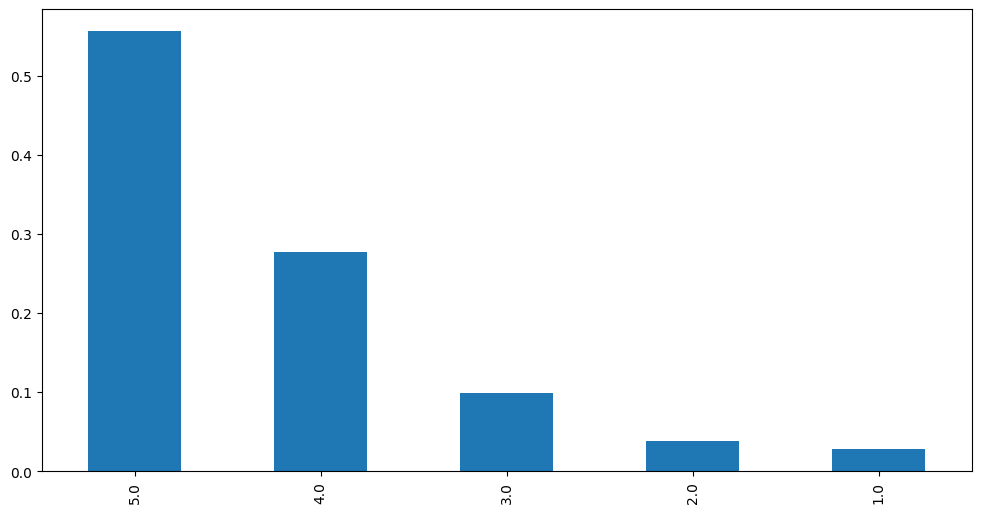

In [ ]:
# Creating a bar plot to show the rating distribution
plt.figure(figsize = (12, 6))
df_final['rating'].value_counts(1).plot(kind = 'bar')
plt.show()

* From the plot above, it can be seen that indeed, most of the observations are having ratings of 5, equalling to more than half of the entire data.

* This can also be attributed to the logical operations we have made earlier when we placed a cutoff on the ratings. Since we wanted to focus more on the observations with ratings of atleast 5, it is no surprise that the final dataset we obtain has ratings of 5 as the majority.

**Checking the number of unique users and items in the dataset**

In [ ]:
# Checking the number of unique users and items
print('The number of observations in the final data = ', len(df_final))
print('Number of unique USERS in Raw data = ', df_final['user_id'].nunique())
print('Number of unique ITEMS in Raw data = ', df_final['prod_id'].nunique())

The number of observations in the final data =  65290
Number of unique USERS in Raw data =  1540
Number of unique ITEMS in Raw data =  5689


* There are **1540 unique users** in the final dataset which have made interactions with atleast one of **5689 items**

* We can also see that the maximum interactions possible for this set is **1540 x 5689 = 8, 761, 060**. However **we only have 65290 observations** in total meaning we can expect **sparse dataset that will contain many blanks in the user - item interaction matrix**.

**Checking Users with the most number of ratings**

In [ ]:
# Top 10 users based on the number of ratings
most_rated = df_final.groupby('user_id').size().sort_values(ascending = False)[:10]
most_rated

user_id
ADLVFFE4VBT8      295
A3OXHLG6DIBRW8    230
A1ODOGXEYECQQ8    217
A36K2N527TXXJN    212
A25C2M3QF9G7OQ    203
A680RUE1FDO8B     196
A22CW0ZHY3NJH8    193
A1UQBFCERIP7VJ    193
AWPODHOB4GFWL     184
A3LGT6UZL99IW1    179
dtype: int64

From the results above it can be seen that the top 10 users in terms of number of ratings posted all have more than 150 ratings:
- The top user is ADLVFFE4VBT8 having made 295 ratings
- This is followed by user A3OXHLG6DIBRW8 with 230 ratings in total
- The top 10 is user A3LGT6UZL99IW1 having around 180 ratings

We can also see that the highest number of **ratings by a user is 295** which is far from the actual number of products present in the data. We can build a recommendation system to recommend products to users which they have not interacted with.

**Now that we have explored and prepared the data, let's build the first recommendation system.**

### **Creating Popularity Based Recommendation Systems**

**Model 1: Building Rank-Based Recommendation System**

In [ ]:
# Calculate the average rating for each product
average_rating = df_final.groupby('prod_id')['rating'].mean()

# Calculate the count of ratings for each product
count_rating = df_final.average_rating = df_final.groupby('prod_id')['rating'].count()

# Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating': average_rating, 'rating_count': count_rating})

# Sort the dataframe by average of ratings in the descending order
final_rating = final_rating.sort_values(by = 'avg_rating', ascending = False)

# See the first five records of the "final_rating" dataset
final_rating.head()

,avg_rating,rating_count
prod_id,,
B00LGQ6HL8,5.0,5
B003DZJQQI,5.0,14
B005FDXF2C,5.0,7
B00I6CVPVC,5.0,7
B00B9KOCYA,5.0,8


In [ ]:
"""Creating a function to find the **top n restaurant** for a recommendation based on the average ratings of the restaurant.
We can also add a **threshold for a minimum number of visits** for a restaurant to be considered for recommendation"""

def top_n_products(data, n, min_interaction):

    # Finding products with minimum number of interactions
    recommendations = data[data['rating_count'] > min_interaction]

    # Sorting values with respect to average rating
    recommendations = recommendations.sort_values(by = 'avg_rating', ascending = False)

    return recommendations.index[:n]

**Recommending top 5 products with 50 minimum interactions based on popularity**

In [ ]:
# Printing out the top product IDs with 50 mininum interactions
list(top_n_products(final_rating, 5, 50))

['B001TH7GUU', 'B003ES5ZUU', 'B0019EHU8G', 'B006W8U2MU', 'B000QUUFRW']

**Recommending top 5 products with 100 minimum interactions based on popularity**

In [ ]:
# Printing out the top product IDs with 100 mininum interactions
list(top_n_products(final_rating, 5, 100))

['B003ES5ZUU', 'B000N99BBC', 'B007WTAJTO', 'B002V88HFE', 'B004CLYEDC']

* We have recommended the **top 5** products by using the popularity recommendation system. Now, let's build a recommendation system using **collaborative filtering.**

### **Creating Collaborative Filtering-Based Recommendation Systems**

## **Model 2: Collaborative Filtering Recommendation System**

#### **Preliminary Steps**

In [ ]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

**Defining basic terminologies:**

* **Relevant item:** An item (product in this case) that is actually **rated higher than the threshold rating (here 3.5)** is relevant, if the **actual rating is below the threshold then it is a non-relevant item**.  

* **Recommended item:** An item that's **predicted rating is higher than the threshold (here 3.5) is a recommended item**, if the **predicted rating is below the threshold then that product will not be recommended to the user**.

* **False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which the company would like to minimize.

* **False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

* **Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

* **Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**Defining Performance Metrics**

* **Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  


* **Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

* **F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them.

**Defining useful functions**
- Below function takes the **recommendation model** as input and gives the **precision@k and recall@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.

In [ ]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    print('Precision: ', precision) # Command to print the overall precision

    print('Recall: ', recall) # Command to print the overall recall

    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

- To compute **precision and recall**, a **threshold of 3.5 and k value of 10 can be considered for the recommended and relevant ratings**.
- Think about the performance metric to choose.

**Converting Data**
* Below we are converting the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`**.
* This is required by the surprise library. To do this, we will be **using the classes `Reader` and `Dataset`**.

In [ ]:
# Checking top 5 rows again
df_final.head()

,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0


In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale = (0, 5))

# Loading the rating dataset
data = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

# Splitting the data into train and test datasets
# For this case we set 20% of the data aside for testing
trainset, testset = train_test_split(data, test_size = 0.2, random_state = 42)

#### **Model 2: Building a User-User Similarity-based Recommendation System**
- Below we are building **similarity-based recommendation systems** using `Pearson` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  

In [ ]:
# Declaring the similarity options
sim_options = {'name': 'cosine', 'user_based': True}

# Initializing the KNNBasic model
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Fit the model on the training data
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score using the precision_recall_at_k function defined above
precision_recall_at_k(sim_user_user)

RMSE: 1.0012
Precision:  0.855
Recall:  0.858
F_1 score:  0.856


* From the results of above the **RMSE is around 1.0012 units** of rating. With a relatively **high precision of 0.855 and a recall of 0.858**.

* This means that for the training set, most of the 'actual relevant items' are recommended to users and most of the recommended items are 'actual relevant' items.

**Predict rating for a user with `userId=A3LDPF5FMB782Z` and `productId=1400501466`**
* Here the user has already interacted or watched the product with productId '1400501466' and given a rating of 5.

In [ ]:
# Predicting rating for a sample user with an interacted product
sim_user_user.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 3.40   {'actual_k': 5, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=3.4, details={'actual_k': 5, 'was_impossible': False})

* From the results above, the predicted rating of our model is around 3.40 as compared to the actual rating of 5. This corresponds to a slightly large discrepancy being a bit higher than the RMSE value.

Below is the **list of users who have not seen the product with product id "1400501466"**.

In [ ]:
# Find unique user_id where prod_id is not equal to "1400501466"
df_final[df_final.prod_id != "1400501466"].user_id.unique()

array(['A2ZR3YTMEEIIZ4', 'A3CLWR1UUZT6TG', 'A5JLAU2ARJ0BO', ...,
       'A215WH6RUDUCMP', 'A38C12950IM24P', 'A2J4XMWKR8PPD0'], dtype=object)

* It can be observed from the above list that **users "A3CLWR1UUZT6TG" and "A34BZM6S9L7QI4" have not seen the product with productId "1400501466"** as this userId is a part of the above list.

**Predicting rating for `userId=A34BZM6S9L7QI4` and `prod_id=1400501466`.**

In [ ]:
# Predicting rating for a sample user with an interacted product
sim_user_user.predict("A3CLWR1UUZT6TG", "1400501466", verbose = True)

user: A3CLWR1UUZT6TG item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A3CLWR1UUZT6TG', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_user_user.predict("A2ZR3YTMEEIIZ4", "1400501466", verbose = True)

user: A2ZR3YTMEEIIZ4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A2ZR3YTMEEIIZ4', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

* After using the trained model to predict ratings of the two users  "A3CLWR1UUZT6TG" and "A34BZM6S9L7QI4" for the product ID 1400501466,
The model puts out a predicted rating of 4.29.

* Moreover, from the results it is seent that the model's prediction is not entirely reliable seing that the parameter 'was_impossible' is outputed to be true because there are **not enough neighbors.** This could mean that **for the item mentioned above, there are very few users who have interacted with it**.
* This means very few similarities can be determined and used as means to predict other users possible rating on the aforementioned item.

We can check this by getting the number of users who have made interactions with this item

In [ ]:
# Checking the number of users who have seen the product
df_final[df_final.prod_id == "1400501466"].user_id.nunique()

6

* It can be seen that from the final dataset, only 6 users have made interactions with the aforementioned product. This could be the underlying reason behind the difficulty of the model to predict ratings for this particular item using the collaborative filtering approach.

> **Improving similarity-based recommendation system by tuning its hyperparameters**

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [20, 30, 40], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [True]}}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.972331526236654
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'cosine', 'user_based': True}}


In [ ]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'cosine',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k = 10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 0.9527
Precision:  0.847
Recall:  0.894
F_1 score:  0.87


From the results above, the following observations can be made:
- The RMSE value decreased indicated that losses have been minimized
- While precision has dropped somewhat slightly, the recall and F1 score both increased, indicating that more of the 'true relevant' products have been recommended

**Checking Model Performance**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Use sim_user_user_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId 1400501466
sim_user_user_optimized.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Use sim_user_user_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
sim_user_user_optimized.predict("A34BZM6S9L7QI4", "1400501466", verbose = True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Observations:**
* From the results above, in the training dataset, the predicted rating for the item **1400501466** is 4.29, which is closer to the actual rating of 5 as compared to the previous model.

* On the other hand, the same results were obtained when the model was used to predict the rating for the uninteracted user A34BZM6S9L7QI4. The same reasons were due to not having enough neighbors to use as guides in predicting the rating.

> **Identifying similar users to a given user (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric.

In [ ]:
# 0 is the inner id of the above user
sim_user_user_optimized.get_neighbors(0, 5)

[6, 7, 17, 26, 32]

> **Implementing the recommendation algorithm based on optimized KNNBasic model**

In [ ]:
# Defining a function that outputs top_n items recommended using input (data, user_id, top_n, algo)

def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'prod_id', values = 'rating')

    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

**Predicting top 5 products for userId = "A3LDPF5FMB782Z" with similarity based recommendation system**

In [ ]:
# Making top 5 recommendations for user_id "A3LDPF5FMB782Z" with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, "A3LDPF5FMB782Z", 5, sim_user_user_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['prod_id', 'predicted_ratings'])

,prod_id,predicted_ratings
0,B000067RT6,5
1,B000BQ7GW8,5
2,B001TH7GUU,5
3,B005ES0YYA,5
4,B00834SJSK,5


* The results above show examples of the top 5 recommended products for user A3LDPF5FMB782Z based on the optimized model. As one would expect, these products are all predicted to be highly rated by the user.

#### **Model 3: Building Item-Item Similarity-based Recommendation Systems**

* Above we have seen **similarity-based collaborative filtering** where similarity is calculated **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between items**.

> **Initiating the Baseline Model and Checking its Performance**

In [ ]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 0.9950
Precision:  0.838
Recall:  0.845
F_1 score:  0.841


* From the results above, the RMSE is lower compared to the unoptimzed User-User Similarity based Recommended Systenm trained before.
- However, precision and recall are a bit lower

**Predict a rating for a user with `userId = A3LDPF5FMB782Z` and `prod_Id = 1400501466`**
* Here the user has already interacted or watched the product with productId "1400501466".

In [ ]:
# Predicting rating for a sample user with an interacted product
sim_item_item.predict('A3LDPF5FMB782Z', '1400501466', r_ui = 5, verbose = True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.27   {'actual_k': 22, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.2727272727272725, details={'actual_k': 22, 'was_impossible': False})

* From the results above, the estimated rating determined by the model is around 4.27, which is considerably closer to the actual rating of 5. This performance is better compared to the one obtained by the unoptimized User-User Similarity-based Recommendation System trained before.
- This could mean that for this case, item-item based collaborative filtering work better compared to user-user based.

**Predicting rating for the `userId = A34BZM6S9L7QI4` and `prod_id = 1400501466`**.

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_item_item.predict('A34BZM6S9L7QI4', '1400501466', verbose = True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

* Similar results are once again obtained for a sample user with a non interacted product.

* **This is because of not having enough neighbors to use as guides to make predictions. This result is not surprising since our dataset is sparse and predictions on some items/users may not be possible by solely relying on similarity-based models.**

> **Improving similarity-based recommendation system by tuning its hyper-parameters**

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30, 40], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9748062904205875
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False}}


In [ ]:
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'msd',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options , k = 30 , min_k = 6 , random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_optimized)

RMSE: 0.9576
Precision:  0.839
Recall:  0.88
F_1 score:  0.859


From the results above, the following can be observed after hyperparameter tuning/optimization:
- The **RMSE has been lowered**
- The P**recision has not been changed significantly but the recall metric has increased signifying that the optimized model is able to capture more 'True Relevant' items to recommend to users**
- The F1 score has also increased correspondingly

**Checking Model Performance**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Use sim_item_item_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
sim_item_item_optimized.predict('A3LDPF5FMB782Z', '1400501466', r_ui = 5, verbose = True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.67   {'actual_k': 22, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.67427701674277, details={'actual_k': 22, 'was_impossible': False})

In [ ]:
# Use sim_item_item_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
sim_item_item_optimized.predict('A34BZM6S9L7QI4', '1400501466', verbose = True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

* Checking the results of the first test above, it can be seen that the **predicted rating of the model is 4.67**, which is **closer to the true rating of 5**, indicating the **higher accuracy due to optimization.**

* On the other hand, since the **model is still smiilarity based** and the **dataset is still sparse**, the **prediction** of the optimized item-item simiarilty based model **for uninteracted products is still unreliable**.
* The **limitation brought about by data sparsity is magnified in such cases** hence it is important to c**heck other Recommendation System models that can mitigate or even eliminate the problem of sparsity in data**.

> **Identifying similar items to a given item (nearest neighbors)**

We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding the 5 most similar items to the item with internal id 0 based on the `msd` distance metric.

In [ ]:
# Using the optimized Recommendation System model to get similar user
sim_item_item_optimized.get_neighbors(0, k = 5)

[29, 53, 67, 106, 151]

**Predicting top 5 products for userId = "A1A5KUIIIHFF4U" with similarity based recommendation system.**

In [ ]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.
recommendations = get_recommendations(df_final, "A1A5KUIIIHFF4U", 5, sim_item_item_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['prod_id', 'predicted_ratings'])

,prod_id,predicted_ratings
0,1400532655,4.292024
1,1400599997,4.292024
2,9983891212,4.292024
3,B00000DM9W,4.292024
4,B00000J1V5,4.292024


Now as we have seen **similarity-based collaborative filtering algorithms**, let us now get into **model-based collaborative filtering algorithms**.

### **Creating Model-Based Collaborative Filtering - Matrix Factorization**



Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

#### **Model 4: Creating a Model-Based Recommendation System using Singular Value Decomposition (SVD)**

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

> **Building a baseline matrix factorization recommendation system and checking the performance**

In [ ]:
# Using SVD matrix factorization. Use random_state = 1
svd = SVD(random_state = 1)

# Training the algorithm on the train set
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 0.8882
Precision:  0.853
Recall:  0.88
F_1 score:  0.866


Just From the initial results shown above, it can be seen that
- The **RMSE value is lower compared** to the previous model, indicating that **SVD can make more accurate predictions for ratings** in this case
- Precision and Recall are relatively the same indicating that the ability to capture 'True Relevant' products and recommend them to users, is the almost the same for all models so far


**Predicting the rating for a user with `userId = "A3LDPF5FMB782Z"` and `prod_id = "1400501466`.**

In [ ]:
# Making prediction
svd.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.08   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.081406749810685, details={'was_impossible': False})

* From the results above, the **SVD model was able to predict a rating of 4.08, relatively close to the true rating of 5.**

* While **the optimized similarity based models trained previously have yielded closer results closer to the true value**, it is **important to look at the performance of the model on predicting ratings for uninteracted products **

**Predicting rating for the `userId = "A34BZM6S9L7QI4"` and `productId = "1400501466"`.**

In [ ]:
# Making prediction
svd.predict("A34BZM6S9L7QI4", "1400501466", verbose = True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.40   {'was_impossible': False}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.40037568046934, details={'was_impossible': False})

* From the reults above,
The **Matrix Factorization model was able to give out a RELIABLE prediction on the rating for uninteracted product**. The **advantage of the SVD-based algorithm in developing recommendation systems using sparse data, is clearly demonstrated here**.

> **Improving Matrix Factorization based recommendation system by tuning its hyperparameters**

In [ ]:
# Set the parameter space to tune
param_grid1 = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross-validation
gs_ = GridSearchCV(SVD, param_grid1, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs_.fit(data)

# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

0.9000762882752867
{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.4}


In [ ]:
# Build the optimized SVD model using optimal hyperparameter search. Use random_state = 1
svd_optimized = SVD(n_epochs = 20, lr_all = 0.01, reg_all = 0.4, random_state = 1)

# Train the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 0.8822
Precision:  0.854
Recall:  0.884
F_1 score:  0.869


The following Observations are made:
- The RMSE value is around 0.88
- Both Precision and Recall are relatively high leading to impressive capability of capturing 'True Relevant' products

**Checking Model Performance**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Use svd_algo_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
svd_optimized.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.04   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.0394144191097014, details={'was_impossible': False})

In [ ]:
# Use svd_algo_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
svd_optimized.predict("A34BZM6S9L7QI4", "1400501466", verbose = True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.17   {'was_impossible': False}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.172649353607237, details={'was_impossible': False})

- From the results above, it can be seent that indeed the SVD-based model performs better compared to user-user and item-item similarity based models trained earlier.

- The SVD model can make reliable predictions on ratings for uninteracted products

**Predicting top 5 products for `userId = "A1A5KUIIIHFF4U"` with similarity based recommendation system.**

In [ ]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.
recommendations = get_recommendations(df_final, "A1A5KUIIIHFF4U", 5, svd_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['prod_id', 'predicted_ratings'])

,prod_id,predicted_ratings
0,B00AR95ESC,4.150583
1,B000JV9LUK,4.146205
2,B002M3SOCE,4.145881
3,B000U8Y88M,4.112234
4,B000PEF254,4.103262


### **Creating Cluster-Based Recommendation System**

Clustering-based models will also be examined to explore similarities and differences between Users, Products, and their respective interactions with one another.

#### **Model 5: Creating a Cluster-based Recommendation System**

> **Building a baseline cluster-based recommendation system and checking the performance**

In [ ]:
# Using Co-Clustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 0.9444
Precision:  0.853
Recall:  0.821
F_1 score:  0.837


In [ ]:
# Predicting rating for a sample user with an interacted product
clust_baseline.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 3.55   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=3.5454001258921153, details={'was_impossible': False})

In [ ]:
# Predicting rating for a sample user with non interacted product
clust_baseline.predict("A34BZM6S9L7QI4", "1400501466", verbose = True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 3.78   {'was_impossible': False}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=3.784300760141587, details={'was_impossible': False})

Observations:
- RMSE value is comparable to other models
- Other performance metrics (Recall and Precision) are somewhat lower
- While CoClustering method was able to provide a reliable prediction for non interacted object, the accuracy of the prediction comes into question seeing as the predicted value for an interacted product is 3.55 and is quite far from the true value of 5
- It can be seen that the performance of Clustering Based model is somewhat poorer compared to Matrix Factorization Model trained above

Lets see if we hyperparameter tuning can help make the model perform better

> **Improving clustering based recommendation system by tuning its hyper-parameters**

In [ ]:
# Setting the parameter space to tune
param_grid = {'n_cltr_u': [3, 4, 5, 6], 'n_cltr_i': [3, 4, 5, 6], 'n_epochs': [30, 40, 50]}

# Performing 3-fold gridsearch cross validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Print the best RMSE score
print(gs.best_score['rmse'])

# Print the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9675978651672547
{'n_cltr_u': 3, 'n_cltr_i': 3, 'n_epochs': 50}


In [ ]:
# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 3,n_cltr_i = 3, n_epochs = 50, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 0.9444
Precision:  0.853
Recall:  0.821
F_1 score:  0.837


In [ ]:
# Predicting rating for a sample user with an interacted product
clust_tuned.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 3.55   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=3.5454001258921153, details={'was_impossible': False})

In [ ]:
# Predicting rating for a sample user with non interacted product
clust_tuned.predict("A34BZM6S9L7QI4", "1400501466", verbose = True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 3.78   {'was_impossible': False}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=3.784300760141587, details={'was_impossible': False})

Observations:
- No observable change in performance is detected
- This confirms that the best Recommendation System model built for this case study is still the Vector Factorization Model

**Predicting top 5 products for userId = "A1A5KUIIIHFF4U" with similarity based recommendation system.**

In [ ]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.
recommendations = get_recommendations(df_final, "A1A5KUIIIHFF4U", 5, clust_tuned)
pd.DataFrame(recommendations, columns = ['prod_id', 'predicted_ratings'])


,prod_id,predicted_ratings
0,B00000K4KH,3.941973
1,B00004SY4H,3.941973
2,B00005AT7Y,3.941973
3,B00005NIMJ,3.941973
4,B00005U21H,3.941973


### **Conclusion and Recommendations**

**Conclusions and Recommendations**

- In this case study, different Recommendation System models were trained and evaluated.
- Popularity based model was used to recommend the top items based on the assumption that all users are the same.
- Models based on Collaborative Filtering algorithms like user-user and item-item Similarity based Recommendation Systems were also trained. Results showed that while such models were able to give predictions of ratings that are closer to the true value, their performance in predicting ratings on uninteracted products were unreliable due to the inherent disadvantage of such models in the analysis of sparse datasets
- Matrix Factorization models were finally trained to account for the sparsity of data and the resulting models were able to provide somewhat reliable predictions on uninteracted products. From this, it is the importance of identifying appropriate models for particular use cases is also highlighted.
- For comparison's sake, clustering based models were also built and trained. However, results showed that Matrix Factorization Model still held the best performance for this particular use case
- Hyperparameter tuning was also applied to all models to obtain optimized versions and the


sample results obtained from the Optimized SVD model are as follows:
For a particular user ID A1A5KUIIIHFF4U, the following products are recommended:

- B00AR95ESC	with a predicted rating of 4.150583
- B000JV9LUK	with a predicted rating 4.146205
- B002M3SOCE	with a predicted rating 4.145881
- B000U8Y88M	with a predicted rating 4.112234
- B000PEF254  with a predicted rating 4.103262


It Must also be noted that these results were obtained from a very small faction of the original dataset that was abstracted with the help of logical operations that were determined using domain knowledge. For more accurate results, Computational power can be a target area of improvement for the company. This will help enable the training of higher-performing Recommendation Systems that are able to capture intricate and complex interactions between target customers and company products
